In [1]:
import numpy as np
import tensorflow as tf

from numpy import genfromtxt
my_data = genfromtxt('data.csv', delimiter=',')

In [2]:
my_data

array([[  1.,   3.,   0.,   0.,   0.],
       [  3.,   1.,   1.,   1.,   1.],
       [  3.,   1.,   3.,   1.,   2.],
       [  3.,   1.,   1.,   0.,   3.],
       [  1.,   0.,   0.,   0.,   4.],
       [  1.,   1.,   3.,   1.,   5.],
       [  3.,   3.,   1.,   0.,   6.],
       [  1.,   1.,   1.,   1.,   7.],
       [  1.,   1.,   0.,   0.,   8.],
       [  1.,   3.,   3.,   3.,   9.],
       [  3.,   1.,   3.,   0.,  10.],
       [  1.,   3.,   1.,   1.,  11.],
       [  3.,   3.,   0.,   0.,  12.],
       [  3.,   1.,   0.,   0.,  13.],
       [  3.,   3.,   3.,   0.,  14.],
       [  1.,   3.,   3.,   1.,  15.],
       [  3.,   3.,   1.,   3.,  16.],
       [  1.,   3.,   1.,   0.,  17.],
       [  1.,   1.,   1.,   0.,  18.],
       [  3.,   0.,   0.,   0.,  19.],
       [  1.,   1.,   3.,   0.,  20.],
       [  1.,   1.,   1.,   3.,  21.],
       [  1.,   3.,   3.,   0.,  22.],
       [  3.,   1.,   1.,   3.,  23.],
       [  3.,   1.,   3.,   3.,  24.],
       [  3.,   3.,   1.,

In [3]:
code = my_data[:,0:4]
label = my_data[:, 4]

In [4]:
sess = tf.InteractiveSession()

In [5]:
one_hot_label = tf.one_hot(label, 26, 1, 0, -1)
one_hot_label = sess.run(one_hot_label)

In [6]:
x = tf.placeholder(tf.float32, [None, 4])
y_ = tf.placeholder(tf.float32, [None, 26])
feed_dict1 = {
    x: code,
    y_: one_hot_label,
}

In [7]:
W1 = tf.Variable(tf.random_normal([4, 4]))
b1 = tf.Variable(tf.random_normal([4]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.random_normal([4, 26]))
b2 = tf.Variable(tf.random_normal([26]))

y = (tf.matmul(y1, W2) + b2)


In [8]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
# train_step  = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
train_step  = tf.train.AdamOptimizer().minimize(loss)

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [9]:
tf.global_variables_initializer().run()

In [10]:
for i in range(100000):
#     batch_xs, batch_ys = mnist.train.next_batch(100)
#     sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    _,acc_val,loss_val = sess.run([train_step, accuracy, loss], feed_dict=feed_dict1)
    if i % 1000 == 0:
        print('loss: ',loss_val, ', acc: ', acc_val)


loss:  10.7196 , acc:  0.0384615
loss:  3.06147 , acc:  0.0769231
loss:  2.1953 , acc:  0.269231
loss:  1.58914 , acc:  0.461538
loss:  1.09561 , acc:  0.730769
loss:  0.756845 , acc:  0.884615
loss:  0.531731 , acc:  0.923077
loss:  0.357496 , acc:  1.0
loss:  0.181782 , acc:  1.0
loss:  0.100122 , acc:  1.0
loss:  0.0372093 , acc:  1.0
loss:  0.0173982 , acc:  1.0
loss:  0.00993201 , acc:  1.0
loss:  0.00596605 , acc:  1.0
loss:  0.0037306 , acc:  1.0
loss:  0.00237345 , acc:  1.0
loss:  0.00152062 , acc:  1.0
loss:  0.00097763 , acc:  1.0
loss:  0.000629155 , acc:  1.0
loss:  0.00040515 , acc:  1.0
loss:  0.000260904 , acc:  1.0
loss:  0.000167868 , acc:  1.0
loss:  0.00010788 , acc:  1.0
loss:  6.92164e-05 , acc:  1.0
loss:  4.43611e-05 , acc:  1.0
loss:  2.84026e-05 , acc:  1.0
loss:  1.81651e-05 , acc:  1.0
loss:  1.16181e-05 , acc:  1.0
loss:  7.36337e-06 , acc:  1.0
loss:  4.52992e-06 , acc:  1.0
loss:  2.76931e-06 , acc:  1.0
loss:  1.71019e-06 , acc:  1.0
loss:  1.04079e-06 ,

# Values histogram analysis 

In [11]:
all_weights = tf.trainable_variables()
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(4,) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(4, 26) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(26,) dtype=float32_ref>]

In [12]:
param_w1 = sess.run(all_weights[0])
param_b1 = sess.run(all_weights[1])
param_w2 = sess.run(all_weights[2])
param_b2 = sess.run(all_weights[3])

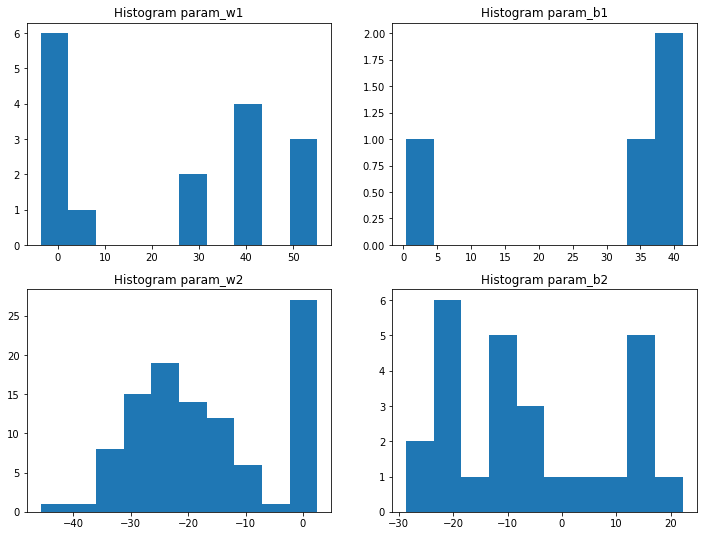

In [13]:
import matplotlib.pyplot as plt

width = 12
height = 9
fig= plt.figure(figsize=(width, height))

plt.subplot(2, 2, 1)
plt.hist(np.reshape(param_w1, [16,1]))  # arguments are passed to np.histogram
plt.title("Histogram param_w1")

plt.subplot(2, 2, 2)
plt.hist(param_b1)  # arguments are passed to np.histogram
plt.title("Histogram param_b1")

plt.subplot(2, 2, 3)
plt.hist(np.reshape(param_w2, [104,1]))  # arguments are passed to np.histogram
plt.title("Histogram param_w2")

plt.subplot(2, 2, 4)
plt.hist(param_b2)  # arguments are passed to np.histogram
plt.title("Histogram param_b2")

plt.show()

In [14]:
print(np.min(param_w1), np.max(param_w1))
print(np.min(param_b1), np.max(param_b1))
print(np.min(param_w2), np.max(param_w2))
print(np.min(param_b2), np.max(param_b2))

-3.61162 55.1345
0.389684 41.2484
-45.6807 2.5121
-28.6893 22.2241


In [15]:
inter_v1, inter_v2 = sess.run([y1, y], feed_dict=feed_dict1)

In [16]:
print(inter_v1.shape)
print(inter_v2.shape)

(26, 4)
(26, 26)


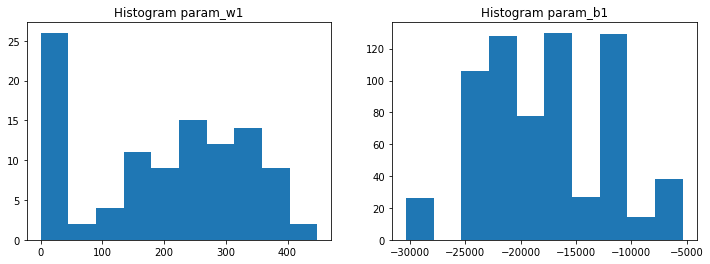

In [17]:
width = 12
height = 4
fig2= plt.figure(figsize=(width, height))

plt.subplot(1, 2, 1)
plt.hist(np.reshape((inter_v1),[104,1])) # arguments are passed to np.histogram
plt.title("Histogram param_w1")

plt.subplot(1, 2, 2)
plt.hist(np.reshape((inter_v2),[676,1]))  # arguments are passed to np.histogram
plt.title("Histogram param_b1")

plt.show()

In [18]:
print(np.min(inter_v1), np.max(inter_v1))
print(np.min(inter_v2), np.max(inter_v2))

0.0 448.553
-30329.6 -5373.14


# Quantization of Values (weights & result) 

In [55]:
num_bits = 8
total_interval = 2**num_bits
print(total_interval)

256


In [56]:
# min_value = np.min([np.min(param_w1), np.min(param_w2), np.min(param_b1), 
#                     np.min(param_b2), np.min(inter_v1), np.min(inter_v2)])
# max_value = np.max([np.max(param_w1), np.max(param_w2), np.max(param_b1), 
#                     np.max(param_b2), np.max(inter_v1), np.max(inter_v2)])
min_value = np.min([np.min(param_w1), np.min(param_w2), np.min(param_b1), np.min(param_b2) ])
max_value = np.max([np.max(param_w1), np.max(param_w2), np.max(param_b1), np.max(param_b2) ])

print(min_value, max_value)

-45.6807 55.1345


In [57]:
interval = (max_value - min_value)/total_interval
print(interval)

0.393809348345


In [58]:
q_p_w1 = ( (param_w1)/interval ).astype(int)
q_p_b1 = ( (param_b1)/interval ).astype(int)
q_p_w2 = ( (param_w2)/interval ).astype(int)
q_p_b2 = ( (param_b2)/interval ).astype(int)


# Inference of Neural Net 

In [59]:
W1 = tf.Variable(tf.random_normal([4, 4]))
b1 = tf.Variable(tf.random_normal([4]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.random_normal([4, 26]))
b2 = tf.Variable(tf.random_normal([26]))

y = (tf.matmul(y1, W2) + b2)

In [60]:
y1_inference = np.matmul(code, q_p_w1 )+q_p_b1

In [61]:
y1_inference_relu = (y1_inference>0 ) * y1_inference

In [62]:
y2_inference = np.matmul(y1_inference_relu, q_p_w2 )+q_p_b2

In [63]:
np.argmax(y2_inference, axis=1)

array([17,  1,  5,  1, 19,  5, 17,  5, 12,  5,  5, 17, 12, 19, 17,  5,  5,
       17,  5, 19,  5, 21, 15, 23,  5, 25])